In [1]:
%matplotlib inline
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from jupyterthemes import jtplot #for making plots appear with same theme
jtplot.style(theme='chesterish', context='notebook', ticks=True, grid=False)

## Data Preprocessing

In [2]:
#indicate dataset path
data_dir = "C:\\Users\\kmens\Desktop\\Fourth Year\\4ML3\\Project\\archive\\NEU Metal Surface Defects Data"
os.listdir(data_dir)

['gen_test', 'gen_train', 'test', 'Thumbs.db', 'train', 'valid']

In [3]:
#test & train paths
test_path = data_dir+'\\test\\'
train_path = data_dir+'\\train\\'

In [4]:
#view folders in test path
os.listdir(test_path)

['Crazing', 'Inclusion', 'Patches', 'Pitted', 'Rolled', 'Scratches']

In [5]:
#pick a random image 
random_inclusion = train_path + "Inclusion\\" + os.listdir(train_path+"Inclusion")[0]
random_inclusion = np.expand_dims(imread(random_inclusion), axis=-1)
#Images must be read as (200,200,1) shape
#check shape
random_inclusion.shape

(200, 200, 1)

In [6]:
train_path + "Inclusion\\" + os.listdir(train_path+"Inclusion")[0]

'C:\\Users\\kmens\\Desktop\\Fourth Year\\4ML3\\Project\\archive\\NEU Metal Surface Defects Data\\train\\Inclusion\\In_120.bmp'

In [7]:
cv2.imshow('sample input', random_inclusion)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
img_shape = (200,200,1)

In [9]:
#initialize image transformer
data_gen = ImageDataGenerator(rotation_range=15, width_shift_range=0.05, height_shift_range=0.05,
                              shear_range = 0.1, horizontal_flip=True,vertical_flip=True, 
                              fill_mode = 'constant')

In [10]:
cv2.imshow("transformed img", data_gen.random_transform(random_inclusion))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
#plt.imshow with "gray" brightens grayscale images too much
#cv2.imshow shows real colors

In [12]:
#train directory with image transformer
train_gen = data_gen.flow_from_directory(train_path,
                                         target_size=(200,200),
                                         color_mode="grayscale",
                                         class_mode="categorical",
                                         batch_size=32,
                                         shuffle=True)

Found 1656 images belonging to 6 classes.


In [13]:
#test directory with image transformer
test_gen = data_gen.flow_from_directory(test_path,
                                        target_size=(200,200),
                                        color_mode="grayscale",
                                        class_mode="categorical",
                                        batch_size=32,
                                        shuffle=False)

Found 72 images belonging to 6 classes.


In [14]:
#one-hot encoded classes
train_gen.class_indices

{'Crazing': 0,
 'Inclusion': 1,
 'Patches': 2,
 'Pitted': 3,
 'Rolled': 4,
 'Scratches': 5}

## Neural Network

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

In [16]:
#initialize network
network = Sequential()

#Convolution and Pooling layers
network.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=img_shape, activation="relu"))
network.add(MaxPool2D(pool_size=(2,2)))
network.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu"))
network.add(MaxPool2D(pool_size=(2,2)))
network.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu"))
network.add(MaxPool2D(pool_size=(2,2)))
network.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu"))
network.add(MaxPool2D(pool_size=(2,2)))

#expand output into a 1D vector
network.add(Flatten())
network.add(Dense(units=256, activation='relu'))

#randomly turn off neurons in Dense layer
network.add(Dropout(0.25))

#prediction output layer with 6 neurons, one for each class
network.add(Dense(units=6, activation='softmax'))
network.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [17]:
#network shapes and parameters
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 32)        9

In [18]:
#stop training when validation loss increases for 10 epochs
early_stop = EarlyStopping(monitor='val_loss', patience=10)

## Results

In [19]:
results = network.fit(x=train_gen, 
                      epochs=100, 
                      validation_data=test_gen)

Epoch 1/100
52/52 [==============================] - 31s 221ms/step - loss: 3.6402 - accuracy: 0.2868 - val_loss: 1.3880 - val_accuracy: 0.3611
Epoch 2/100
52/52 [==============================] - 4s 72ms/step - loss: 1.3843 - accuracy: 0.4016 - val_loss: 1.1874 - val_accuracy: 0.5694
Epoch 3/100
52/52 [==============================] - 4s 73ms/step - loss: 1.6393 - accuracy: 0.3037 - val_loss: 1.4533 - val_accuracy: 0.3333
Epoch 4/100
52/52 [==============================] - 4s 75ms/step - loss: 1.4116 - accuracy: 0.3768 - val_loss: 1.2961 - val_accuracy: 0.3889
Epoch 5/100
52/52 [==============================] - 4s 73ms/step - loss: 1.3197 - accuracy: 0.4070 - val_loss: 1.2729 - val_accuracy: 0.3472
Epoch 6/100
52/52 [==============================] - 4s 72ms/step - loss: 1.3328 - accuracy: 0.3967 - val_loss: 1.3070 - val_accuracy: 0.3611
Epoch 7/100
52/52 [==============================] - 4s 73ms/step - loss: 1.3018 - accuracy: 0.3943 - val_loss: 1.2867 - val_accuracy: 0.4028
Epoc

52/52 [==============================] - 4s 77ms/step - loss: 0.2695 - accuracy: 0.8822 - val_loss: 0.2496 - val_accuracy: 0.9028
Epoch 59/100
52/52 [==============================] - 4s 77ms/step - loss: 0.2487 - accuracy: 0.9022 - val_loss: 0.2428 - val_accuracy: 0.8889
Epoch 60/100
52/52 [==============================] - 4s 76ms/step - loss: 0.2709 - accuracy: 0.8859 - val_loss: 0.2300 - val_accuracy: 0.9028
Epoch 61/100
52/52 [==============================] - 4s 77ms/step - loss: 0.2386 - accuracy: 0.9040 - val_loss: 0.2387 - val_accuracy: 0.9167
Epoch 62/100
52/52 [==============================] - 4s 76ms/step - loss: 0.2738 - accuracy: 0.8931 - val_loss: 0.4063 - val_accuracy: 0.8194
Epoch 63/100
52/52 [==============================] - 4s 76ms/step - loss: 0.2181 - accuracy: 0.9118 - val_loss: 0.4712 - val_accuracy: 0.8194
Epoch 64/100
52/52 [==============================] - 4s 76ms/step - loss: 0.2739 - accuracy: 0.8889 - val_loss: 0.3835 - val_accuracy: 0.8333
Epoch 65/100

In [20]:
metrics = pd.DataFrame(network.history.history)

(0.0, 1.0)

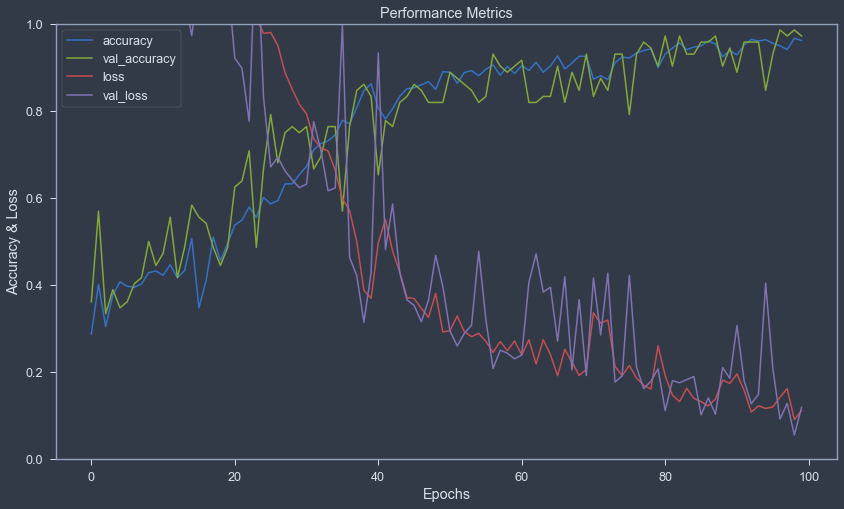

In [22]:
metrics[['accuracy','val_accuracy', 'loss','val_loss']].plot(figsize=(14,8))
plt.title("Performance Metrics")
plt.xlabel("Epochs")
plt.ylabel("Accuracy & Loss")
plt.ylim((0,1))

(0.0, 3.0)

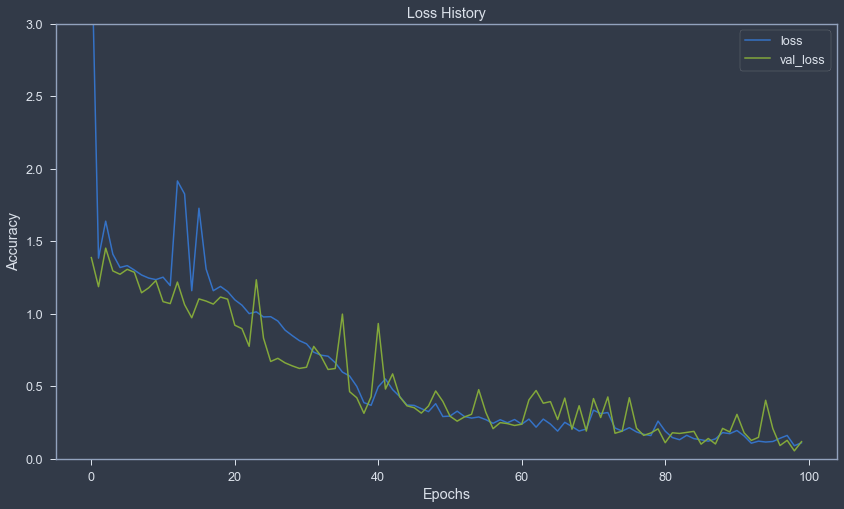

In [23]:
metrics[['loss','val_loss']].plot(figsize=(14,8))
plt.title("Loss History")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.ylim((0,3))

In [24]:
#prediction for random inclusion
random_inclusion = np.expand_dims(random_inclusion, axis=0)

In [25]:
network.predict_classes(random_inclusion)

C:\Users\kmens\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([1], dtype=int64)

In [26]:
#save prediction
#network.save("DefectClassifier02.h5")

In [29]:
#save model history
#pd.DataFrame.from_dict(results.history).to_csv('history.csv',index=False)

In [30]:
metrics[['accuracy','val_accuracy']]

,accuracy,val_accuracy
0,0.286836,0.361111
1,0.401570,0.569444
2,0.303744,0.333333
3,0.376812,0.388889
4,0.407005,0.347222
...,...,...
95,0.955314,0.930556
96,0.949879,0.986111
97,0.940821,0.972222
98,0.966787,0.986111


In [31]:
metrics[['loss','val_loss']]

,loss,val_loss
0,3.640235,1.388023
1,1.384295,1.187374
2,1.639347,1.453345
3,1.411575,1.296079
4,1.319658,1.272920
...,...,...
95,0.119299,0.208243
96,0.141607,0.091474
97,0.161214,0.127367
98,0.090019,0.054864
